# ***Bagging & Boosting KNN & Stacking***

---



**Question 1 :** What is the fundamental idea behind ensemble techniques? How does
bagging differ from boosting in terms of approach and objective?
**Answer:**

The fundamental idea behind ensemble techniques is to combine multiple models (weak learners) to form a stronger, more robust model.
Ensemble methods reduce variance, bias, and improve overall prediction stability.

Aspect	Bagging	Boosting
Full form	Bootstrap Aggregating	Adaptive Boosting
Objective	Reduce variance	Reduce bias
Working	Trains multiple models independently on random data samples	Trains models sequentially, each correcting the previous model’s errors
Example Algorithms	Random Forest	AdaBoost, Gradient Boosting
Result	Improves model stability and reduces overfitting	Improves accuracy by focusing on difficult samples


**Question 2:** Explain how the Random Forest Classifier reduces overfitting compared to
a single decision tree. Mention the role of two key hyperparameters in this process.
***Answer:***

A Random Forest reduces overfitting by combining multiple decision trees trained on different random subsets of data and features.
Each tree contributes to the final prediction by majority voting (classification) or averaging (regression).

How it reduces overfitting:

Randomly selects data samples (bootstrapping)

Randomly selects features at each split

Aggregates multiple trees to generalize better

Key Hyperparameters:

n_estimators: Number of trees. More trees increase stability but raise computation time.

max_features: Number of features considered when splitting a node. Lowering this increases model diversity and reduces overfitting.

**Question 3:** What is Stacking in ensemble learning? How does it differ from traditional
bagging/boosting methods? Provide a simple example use case.

**Answer:**

Stacking (Stacked Generalization) is an ensemble method where multiple base models are trained and their outputs are combined using a meta-model (final estimator).

Difference from Bagging/Boosting:

Aspect	Bagging/Boosting	Stacking
Model Relationship	Same-type models (homogeneous)	Different models (heterogeneous)
Combination	Averaging or weighted voting	Meta-model learns the best combination
Training	Parallel or sequential	Two-layered (base + meta)

Example Use Case:
Predicting loan approval, where base models (Decision Tree, SVM, Logistic Regression) make initial predictions, and a meta-model (Random Forest) learns to combine them for better accuracy.

**Question 4**:What is the OOB Score in Random Forest, and why is it useful? How does
it help in model evaluation without a separate validation set?

**Answer:**

The OOB (Out-of-Bag) Score is an internal validation score used in Random Forest.
When bootstrapping, about 1/3rd of samples are left out (OOB samples) and not used in training each tree. These OOB samples are used to evaluate model performance.

Benefits:

Acts as a built-in validation score.

Saves data since no separate validation set is needed.

Gives an unbiased estimate of generalization performance.

**Question 5:** Compare AdaBoost and Gradient Boosting in terms of:
● How they handle errors from weak learners
● Weight adjustment mechanism
● Typical use cases

***answer***

Aspect	AdaBoost	Gradient Boosting
Error Handling	Focuses on misclassified samples by adjusting their weights	Optimizes residual errors (difference between prediction and true value)
Weight Adjustment	Increases weights of misclassified data	Fits the next model to minimize loss gradient
Learning Rate	Controls weight adjustment	Controls contribution of each tree
Typical Use Cases	Spam detection, credit scoring	Structured data, tabular prediction, regression
Base Learners	Usually decision stumps (1-level trees)	Deeper trees for more complex learning

In [ ]:
#Question 6:Why does CatBoost perform well on categorical features without requiringextensive preprocessing? Briefly explain its handling of categorical variables.
Answer:

CatBoost (Categorical Boosting) is a gradient boosting algorithm designed to handle categorical data efficiently.

Reasons it performs well:

Automatic Encoding: Uses ordered target encoding that converts categorical variables into numerical values based on target statistics.

Avoids Overfitting: Applies permutation-driven encoding, ensuring the target mean is computed only from previous data points.

Handles Missing Values: Inherently manages missing values.

Less Preprocessing: No need for one-hot encoding or label encoding manually.

In [1]:
#Question 7: KNN Classifier Assignment: Wine Dataset Analysis withOptimization
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

# Load dataset
wine = load_wine()
X, y = wine.data, wine.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# KNN without scaling
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("Without Scaling Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Apply StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_scaled = KNeighborsClassifier(n_neighbors=5)
knn_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = knn_scaled.predict(X_test_scaled)
print("With Scaling Accuracy:", accuracy_score(y_test, y_pred_scaled))
print(classification_report(y_test, y_pred_scaled))

# GridSearchCV for optimization
param_grid = {
    'n_neighbors': list(range(1, 21)),
    'metric': ['euclidean', 'manhattan']
}
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid.fit(X_train_scaled, y_train)

print("Best Parameters:", grid.best_params_)
best_knn = grid.best_estimator_
print("Optimized KNN Accuracy:", accuracy_score(y_test, best_knn.predict(X_test_scaled)))


Without Scaling Accuracy: 0.7407407407407407
              precision    recall  f1-score   support

           0       0.89      0.89      0.89        19
           1       0.75      0.71      0.73        21
           2       0.53      0.57      0.55        14

    accuracy                           0.74        54
   macro avg       0.73      0.73      0.73        54
weighted avg       0.74      0.74      0.74        54

With Scaling Accuracy: 0.9629629629629629
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        19
           1       1.00      0.90      0.95        21
           2       0.93      1.00      0.97        14

    accuracy                           0.96        54
   macro avg       0.96      0.97      0.96        54
weighted avg       0.97      0.96      0.96        54

Best Parameters: {'metric': 'manhattan', 'n_neighbors': 1}
Optimized KNN Accuracy: 0.9629629629629629


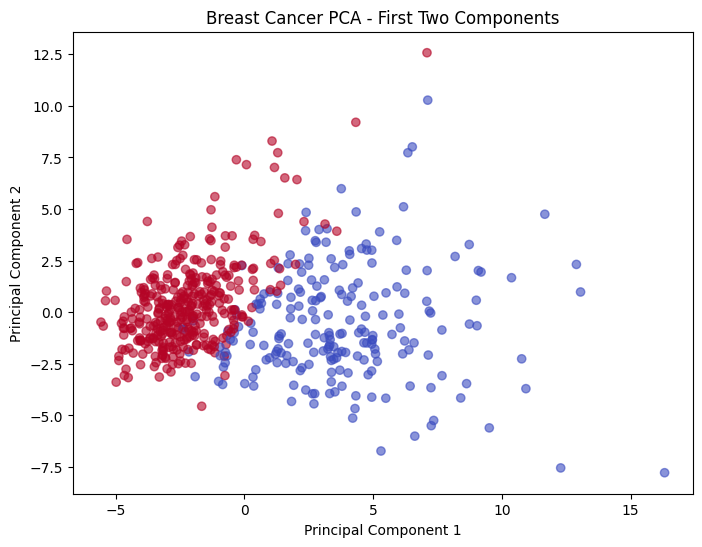

In [6]:
#Question 8 : PCA + KNN with Variance Analysis and Visualization
# Q8 - Apply PCA on Breast Cancer dataset and visualize first two components

from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA with 2 components (✅ Fix)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Visualization
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='coolwarm', alpha=0.6)
plt.title("Breast Cancer PCA - First Two Components")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()



Euclidean MSE: 5168.119991582047
Manhattan MSE: 5479.050529314929


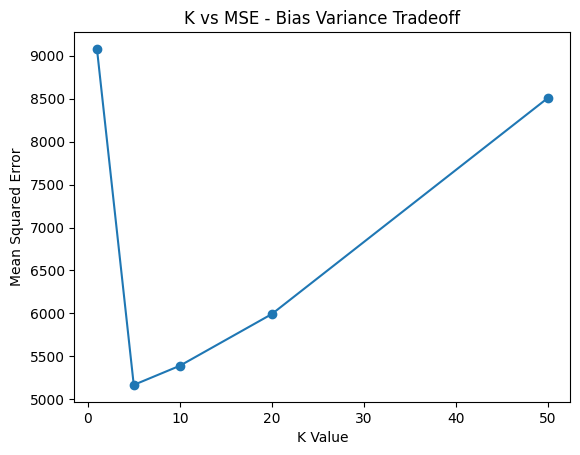

In [3]:
#Question 9:KNN Regressor with Distance Metrics and K-ValueAnalysis
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

X, y = make_regression(n_samples=500, n_features=10, noise=20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Euclidean and Manhattan
for metric in ['euclidean', 'manhattan']:
    model = KNeighborsRegressor(n_neighbors=5, metric=metric)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"{metric.capitalize()} MSE:", mse)

# K vs MSE Plot
mse_values = []
for k in [1, 5, 10, 20, 50]:
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train, y_train)
    mse_values.append(mean_squared_error(y_test, model.predict(X_test)))

plt.plot([1, 5, 10, 20, 50], mse_values, marker='o')
plt.title("K vs MSE - Bias Variance Tradeoff")
plt.xlabel("K Value")
plt.ylabel("Mean Squared Error")
plt.show()


Performance Comparison:

           Accuracy  Time (s)
brute      0.714286    0.0088
kd_tree    0.714286    0.0121
ball_tree  0.714286    0.0129


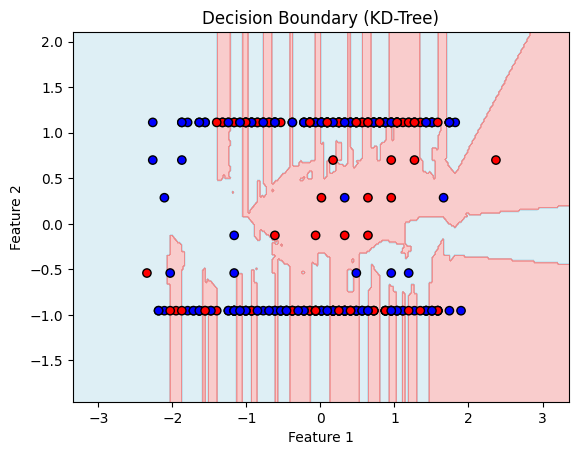

In [7]:
#Question 10: KNN with KD-Tree/Ball Tree, Imputation, and Real-World Data
# Q10 - KNN with KD-Tree, Ball Tree, Imputation, and Real-World Data
# Question 10 - KNN with KD-Tree / Ball Tree / Imputation / Real-World Data

import pandas as pd
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.impute import KNNImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import time

# 1️⃣ Load Diabetes Dataset (from sklearn - safe alternative)
data = load_diabetes()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = (data.target > data.target.mean()).astype(int)  # Convert regression target to classification

# 2️⃣ Introduce artificial missing values for demo (to test imputation)
np.random.seed(42)
for col in df.columns[:5]:
    df.loc[df.sample(frac=0.1).index, col] = np.nan

# 3️⃣ Impute missing values using KNNImputer
imputer = KNNImputer(n_neighbors=5)
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# 4️⃣ Prepare data
X = df_imputed.drop('target', axis=1)
y = df_imputed['target']

# 5️⃣ Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 6️⃣ Train with different algorithms
methods = ['brute', 'kd_tree', 'ball_tree']
results = {}

for algo in methods:
    start = time.time()
    knn = KNeighborsClassifier(n_neighbors=5, algorithm=algo)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    end = time.time()

    acc = accuracy_score(y_test, y_pred)
    results[algo] = {'Accuracy': acc, 'Time (s)': round(end - start, 4)}

# 7️⃣ Display results
results_df = pd.DataFrame(results).T
print("Performance Comparison:\n")
print(results_df)

# 8️⃣ Visualization - Decision Boundary (using first 2 features)
from matplotlib.colors import ListedColormap

X_plot = X_train_scaled[:, :2]
y_plot = y_train

knn_best = KNeighborsClassifier(n_neighbors=5, algorithm='kd_tree')
knn_best.fit(X_plot, y_plot)

x_min, x_max = X_plot[:, 0].min() - 1, X_plot[:, 0].max() + 1
y_min, y_max = X_plot[:, 1].min() - 1, X_plot[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

Z = knn_best.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4, cmap=ListedColormap(('lightblue', 'lightcoral')))
plt.scatter(X_plot[:, 0], X_plot[:, 1], c=y_plot, edgecolor='k', cmap=ListedColormap(('blue', 'red')))
plt.title("Decision Boundary (KD-Tree)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

